In [1]:
import tensorflow as tf

## Define Data

In [2]:
# Actual data
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 10000

# Vector of random values
x = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
y = x * TRUE_W + TRUE_B + noise


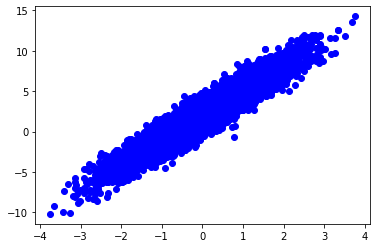

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c='b')
plt.show()

## Define Model

In [4]:
class MyModel(tf.Module):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b


In [5]:
model = MyModel()
print("Variables: ", model.variables)
assert model(3.0) == 15

Variables:  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


### Define loss

In [6]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

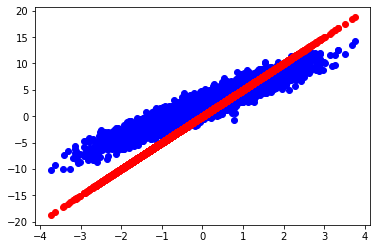

In [7]:
# Visualize predictions for untrained model
plt.scatter(x, y, c='b')
plt.scatter(x, model(x), c='r')
plt.show()

## Training Loop

In [8]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(y, model(x))
    dw, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [9]:
model = MyModel()
Ws, bs, = [], []
epochs = range(30)

def training_loop(model, x, y):
    for epoch in epochs:
        train(model, x, y, learning_rate=0.1)
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())
        current_loss = loss(y, model(x))

        print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" % (
            epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=8.93316
Epoch  0: W=4.60 b=0.40, loss=6.07630
Epoch  1: W=4.29 b=0.72, loss=4.25041
Epoch  2: W=4.03 b=0.97, loss=3.08342
Epoch  3: W=3.83 b=1.18, loss=2.33757
Epoch  4: W=3.67 b=1.34, loss=1.86087
Epoch  5: W=3.54 b=1.47, loss=1.55619
Epoch  6: W=3.43 b=1.58, loss=1.36146
Epoch  7: W=3.35 b=1.66, loss=1.23701
Epoch  8: W=3.28 b=1.72, loss=1.15746
Epoch  9: W=3.23 b=1.78, loss=1.10662
Epoch 10: W=3.18 b=1.82, loss=1.07412
Epoch 11: W=3.15 b=1.85, loss=1.05336
Epoch 12: W=3.12 b=1.88, loss=1.04008
Epoch 13: W=3.10 b=1.90, loss=1.03160
Epoch 14: W=3.08 b=1.92, loss=1.02617
Epoch 15: W=3.07 b=1.93, loss=1.02271
Epoch 16: W=3.06 b=1.94, loss=1.02049
Epoch 17: W=3.05 b=1.95, loss=1.01908
Epoch 18: W=3.04 b=1.96, loss=1.01817
Epoch 19: W=3.04 b=1.97, loss=1.01759
Epoch 20: W=3.03 b=1.97, loss=1.01722
Epoch 21: W=3.03 b=1.97, loss=1.01699
Epoch 22: W=3.03 b=1.98, loss=1.01684
Epoch 23: W=3.02 b=1.98, loss=1.01674
Epoch 24: W=3.02 b=1.98, loss=1.01668
Epoch 25: W=

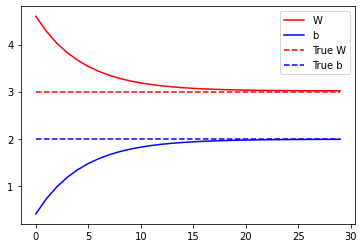

In [10]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model=model, x=x, y=y)

# Plot it
plt.plot(epochs, Ws, "r", epochs, bs, "b")
plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

## Visualize Trained Model

Current loss: 1.016582


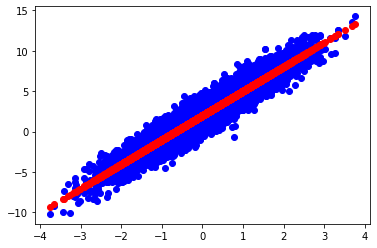

In [14]:
plt.scatter(x, y, c='b')
plt.scatter(x, model(x), c='r') 
print("Current loss: %1.6f" % loss(model(x), y).numpy())
plt.show()

## Keras Implementation

In [15]:
class MyModelKeras(tf.keras.Model):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0, name='w')
        self.b = tf.Variable(3.0, name='b')

    def call(self, x):
        return self.w * x + self.b

In [16]:
kmodel = MyModelKeras()
training_loop(kmodel, x, y)
kmodel.save_weights('kmodel_checkpoint')

Epoch  0: W=4.61 b=2.80, loss=4.18053
Epoch  1: W=4.29 b=2.64, loss=3.05132
Epoch  2: W=4.04 b=2.51, loss=2.32513
Epoch  3: W=3.84 b=2.41, loss=1.85811
Epoch  4: W=3.67 b=2.32, loss=1.55777
Epoch  5: W=3.54 b=2.26, loss=1.36461
Epoch  6: W=3.44 b=2.20, loss=1.24040
Epoch  7: W=3.35 b=2.16, loss=1.16052
Epoch  8: W=3.29 b=2.13, loss=1.10914
Epoch  9: W=3.23 b=2.10, loss=1.07610
Epoch 10: W=3.19 b=2.08, loss=1.05486
Epoch 11: W=3.15 b=2.06, loss=1.04119
Epoch 12: W=3.13 b=2.05, loss=1.03240
Epoch 13: W=3.10 b=2.03, loss=1.02675
Epoch 14: W=3.09 b=2.03, loss=1.02312
Epoch 15: W=3.07 b=2.02, loss=1.02078
Epoch 16: W=3.06 b=2.01, loss=1.01928
Epoch 17: W=3.05 b=2.01, loss=1.01831
Epoch 18: W=3.04 b=2.00, loss=1.01769
Epoch 19: W=3.04 b=2.00, loss=1.01729
Epoch 20: W=3.03 b=2.00, loss=1.01703
Epoch 21: W=3.03 b=2.00, loss=1.01687
Epoch 22: W=3.03 b=1.99, loss=1.01676
Epoch 23: W=3.02 b=1.99, loss=1.01669
Epoch 24: W=3.02 b=1.99, loss=1.01665
Epoch 25: W=3.02 b=1.99, loss=1.01662
Epoch 26: W=

### Keras Training loop

In [18]:
kmodel2 = MyModelKeras()

# Define keras train parameters using "compile()"
kmodel2.compile(
    run_eagerly=False, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.mean_squared_error
)

# training loop
kmodel2.fit(x, y, epochs=10, batch_size=1000)

Epoch 1/10
10/10 [==============================] - 0s 661us/step - loss: 2.3711
Epoch 2/10
10/10 [==============================] - 0s 650us/step - loss: 1.0329
Epoch 3/10
10/10 [==============================] - 0s 739us/step - loss: 1.0173
Epoch 4/10
10/10 [==============================] - 0s 699us/step - loss: 1.0170
Epoch 5/10
10/10 [==============================] - 0s 629us/step - loss: 1.0167
Epoch 6/10
10/10 [==============================] - 0s 568us/step - loss: 1.0167
Epoch 7/10
10/10 [==============================] - 0s 641us/step - loss: 1.0170
Epoch 8/10
10/10 [==============================] - 0s 609us/step - loss: 1.0169
Epoch 9/10
10/10 [==============================] - 0s 709us/step - loss: 1.0169
Epoch 10/10
10/10 [==============================] - 0s 618us/step - loss: 1.0169
